# [CDAF] Atividade 2

## Nome e matrícula
Nome: Othávio Ruddá da Cunha Araújo
Matrícula: 2018054567

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('banco.csv', header=0)
df.dropna(how='all', inplace=True)

In [20]:
df.head(15)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,22855.0,Estadio Jornalista Mário Filho,Anderson Daronco,Match Report,NaN
1,1.0,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,10496.0,Estádio Antônio Accioly,Braulio da Silva Machado,Match Report,NaN
2,1.0,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,17788.0,Estádio Major Antônio Couto Pereira,Raphael Claus,Match Report,NaN
3,1.0,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,37531.0,Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,Match Report,NaN
4,1.0,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,36898.0,Estádio Nilton Santos,Wilton Sampaio,Match Report,NaN
5,1.0,Sun,2022-04-10,18:00,Fortaleza,1.4,0–1,0.4,Cuiabá,18279.0,Estádio Castelão,Felipe Fernandes de Lima,Match Report,NaN
6,1.0,Sun,2022-04-10,19:00,Avaí,1.0,1–0,0.3,América (MG),5081.0,Estádio Aderbal Ramos da Silva,Luiz Flávio de Oliveira,Match Report,NaN
7,1.0,Sun,2022-04-10,19:00,São Paulo,1.6,4–0,0.3,Atl Paranaense,20606.0,Estádio do Morumbi,Wagner do Nascimento Magalhães,Match Report,NaN
8,1.0,Sat,2022-04-09,21:00,Palmeiras,2.5,2–3,1.5,Ceará,27100.0,Allianz Parque,Caio Max Augusto Vieira,Match Report,NaN
9,1.0,Mon,2022-04-11,20:00,Juventude,1.5,2–2,1.0,Bragantino,3300.0,Estádio Alfredo Jaconi,Rodolpho Toski Marques,Match Report,NaN


In [37]:
def quest1_2(df, n_jogos): 
   # Calcula a média móvel de 5 jogos para cada equipe
    df['xG_pro_avg'] = df.groupby('Home')['xG'].rolling(n_jogos).mean().reset_index(0, drop=True)
    df['xG_con_avg'] = df.groupby('Home')['xG.1'].rolling(n_jogos).mean().reset_index(0, drop=True)
    df['xG_diff'] = df['xG'] - df['xG.1']
    df['xG_diff_avg'] = df.groupby('Home')['xG_diff'].rolling(n_jogos).mean().reset_index(0, drop=True)

    # Seleciona 4 times para visualização
    teams = ['Palmeiras', 'Flamengo', 'São Paulo', 'Corinthians']

    # Plota as séries temporais para cada estatística, para os times selecionados
    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    for ax, stat in zip(axs, ['xG_pro_avg', 'xG_con_avg', 'xG_diff_avg']):
        ax.plot(df[stat], label='Média Geral', linestyle='--', color='gray')
        for team in teams:
            team_df = df[df['Home'] == team]
            ax.plot(team_df[stat], label=team)
        ax.set_ylabel(stat)
        ax.legend()
    plt.xticks(rotation=45)
    plt.show()

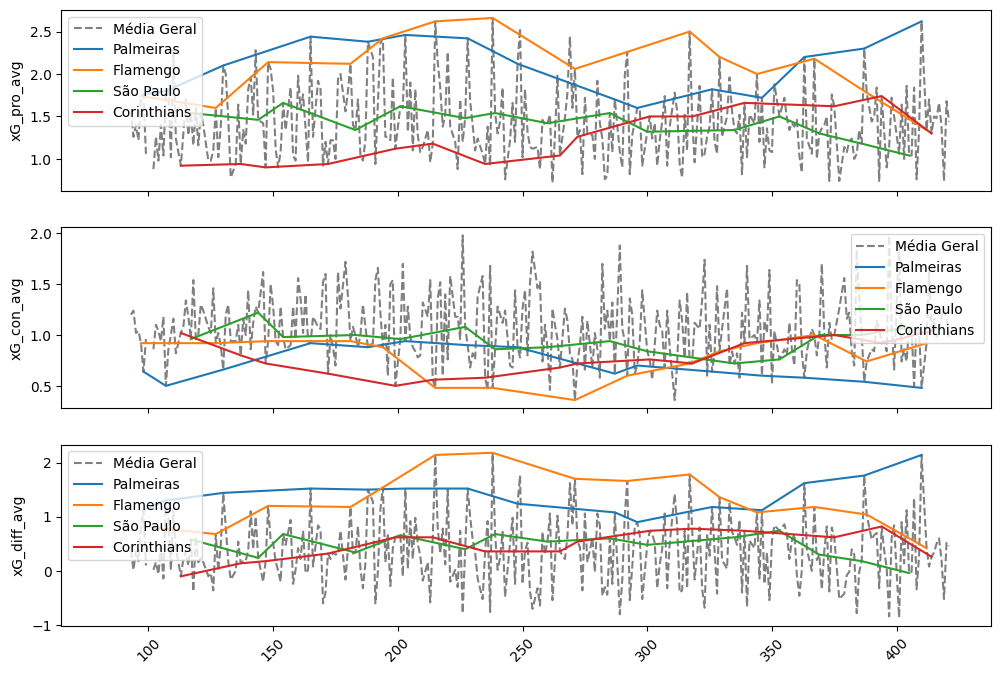

In [38]:
quest1_2(df,5)

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela à outra?

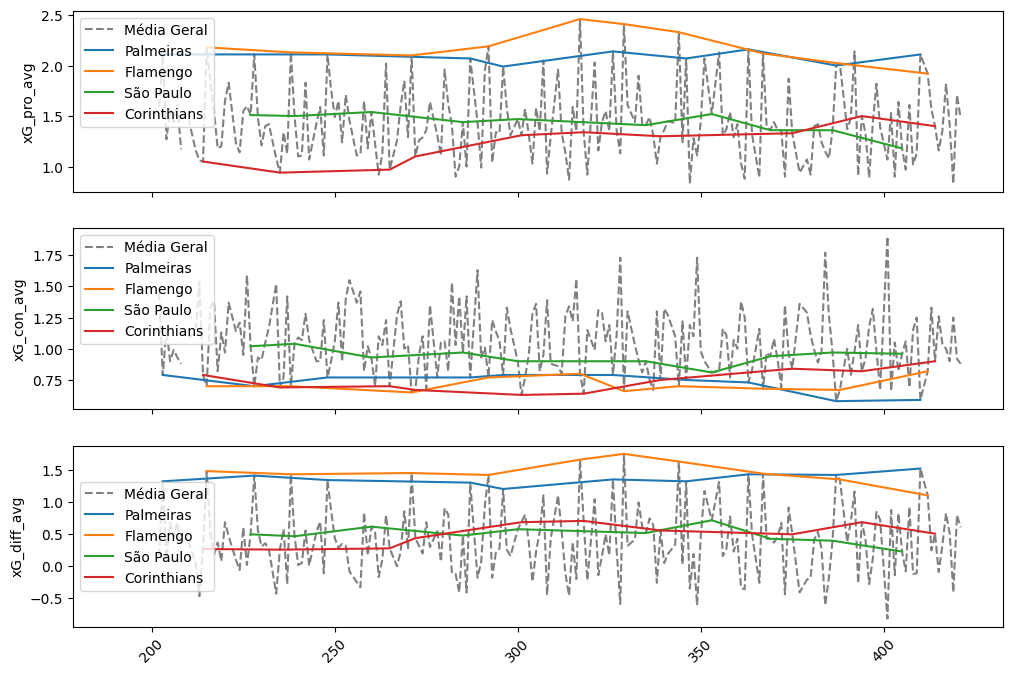

In [39]:
quest1_2(df,10)

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2022/stats/2022-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios à partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [45]:
df = pd.read_csv('stats.csv', header=0)
df.head()


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999
0,1,Abner,br BRA,DF,Atl Paranaense,21,2000,28,25,2106,...,0.13,0.04,0.13,0.05,0.09,0.15,0.05,0.15,Matches,7f9c5d2d
1,2,Adryelson,br BRA,DF,Botafogo (RJ),23,1998,17,16,1446,...,0.00,0.00,0.00,0.08,0.02,0.10,0.08,0.10,Matches,e980e78d
2,3,Adson,br BRA,FWMF,Corinthians,21,2000,25,13,1239,...,0.22,0.22,0.22,0.19,0.06,0.25,0.19,0.25,Matches,eda38706
3,4,Airton,br BRA,FW,Atl Goianiense,22,1999,33,22,1738,...,0.31,0.10,0.31,0.19,0.14,0.34,0.19,0.34,Matches,751ef075
4,5,Carlos Alberto,br BRA,FWMF,América (MG),19,2002,6,0,156,...,0.00,0.00,0.00,0.41,0.06,0.47,0.41,0.47,Matches,08f48d96


In [ ]:
attributes = ['Goals', 'Shots on target', 'xA', 'Successful dribbles', 'Touches in opposition box', 'Fouls drawn']


## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?